<a href="https://colab.research.google.com/github/laxmisuprini/FinalYearProject/blob/master/testig(prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
import h5py
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,History
#from sklearn.metrics import confusion_matrix
#for broken data stream error
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import itertools
#for broken data stream error
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
#import matplotlib.pyplot as plt
#%matplotlib inline

Using TensorFlow backend.


In [2]:
#@title
keras.__version__

'2.3.1'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model = keras.models.load_model('/content/drive/My Drive/Fire_Detect/fireDetect.h5')

In [0]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [6]:
import os
os.chdir("/content/drive/My Drive/Fire_Detect")
!pwd

/content/drive/My Drive/Fire_Detect


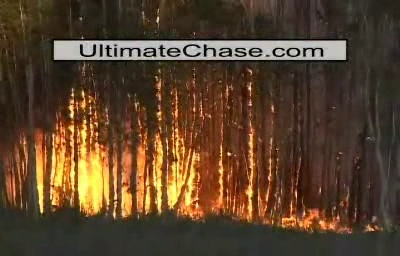

In [7]:
from IPython.display import Image
Image(filename='15.jpg', width=300,height=200) 

In [10]:
preprocessed_image = prepare_image('15.jpg')
predictions = model.predict(preprocessed_image)
print(predictions)
print("Fire :",str(predictions[0][0]*100)[:4] + "%"," |Not Fire:",str(predictions[0][1]*100)[:4]+"%")
labels=(predictions>0.5).astype(np.int)
#print(labels)
if labels[0][0]==1 :
    print("Fire detected")
else:
    print("No Fire detected")

#results = imagenet_utils.decode_predictions(predictions)
#results

[[1.0000000e+00 1.8002554e-08]]
Fire : 100.%  |Not Fire: 1.80%
Fire detected
